In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lego-database/downloads_schema.png
/kaggle/input/lego-database/themes.csv
/kaggle/input/lego-database/inventory_sets.csv
/kaggle/input/lego-database/part_categories.csv
/kaggle/input/lego-database/parts.csv
/kaggle/input/lego-database/sets.csv
/kaggle/input/lego-database/inventories.csv
/kaggle/input/lego-database/inventory_parts.csv
/kaggle/input/lego-database/colors.csv


In [2]:
sets = pd.read_csv('/kaggle/input/lego-database/sets.csv')

In [3]:
sets.head()
sets[sets['year']==1950]

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


**How have the size of sets changed over time?**

In [4]:
sets.shape

(11673, 5)

In [5]:
sets.info() # We see that set_num is an object, maybe because it has hyphen '-' ??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
set_num      11673 non-null object
name         11673 non-null object
year         11673 non-null int64
theme_id     11673 non-null int64
num_parts    11673 non-null int64
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


In [6]:
sets.describe().astype(int) # num_parts as '-1' ?? Very strange!

,year,theme_id,num_parts
count,11673,11673,11673
mean,2001,311,162
std,13,177,330
min,1950,1,-1
25%,1997,161,10
50%,2005,324,45
75%,2012,470,172
max,2017,614,5922


In [7]:
cat_cols = len(sets.select_dtypes(include = ['object']).columns)
num_cols = len(sets.select_dtypes(include = ['int64']).columns)
print("Number of Categorical columns ({0}) + Number of Numerical columns ({1}) = Total number of columns ({2})".format(cat_cols,num_cols,(cat_cols + num_cols)))

Number of Categorical columns (2) + Number of Numerical columns (3) = Total number of columns (5)


**UNIVARIATE ANALYSIS FOR CATEGORICAL ATTRIBUTES**

In [8]:
sets['set_num'].value_counts() # Like anticipated earlier, this looks to be hoax! Its continous and not Cateogrical. Lets skip this for now!

6603-1     1
75023-3    1
3317-1     1
4987-1     1
7575-2     1
          ..
7574-8     1
9509-12    1
3316-21    1
3093-1     1
40146-1    1
Name: set_num, Length: 11673, dtype: int64

In [9]:
sets['name'].value_counts() # Looks like 'Basic Building Set' and 'Universal Building Set' are often used, while 'Airport Shuttle' and others are very less manufactured!

Basic Building Set                              55
Universal Building Set                          32
Basic Set                                       23
Helicopter                                      23
Fire Station                                    14
                                                ..
Windows Parts Pack, White (The Building Toy)     1
Tokyo Pit Stop                                   1
Trick or Treat                                   1
Evil Robot - Complete Set                        1
Lego Bausteine - System im Spiel                 1
Name: name, Length: 10370, dtype: int64

In [10]:
# No null values

**Univariate analysis for Numerical Data**

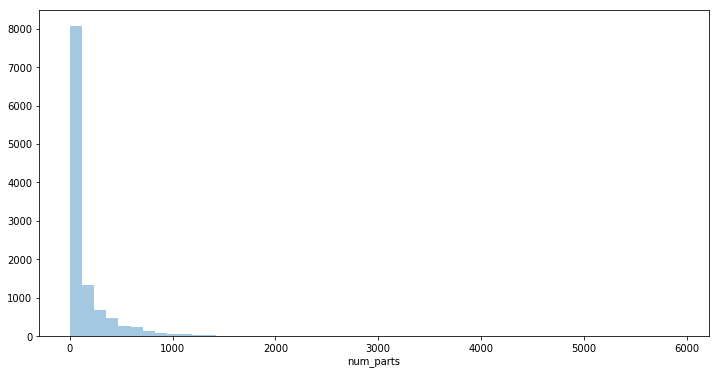

In [11]:
# Lets analyse the num_parts feature.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
plt.figure(figsize=(12,6))
sns.distplot(sets.num_parts,kde=False)

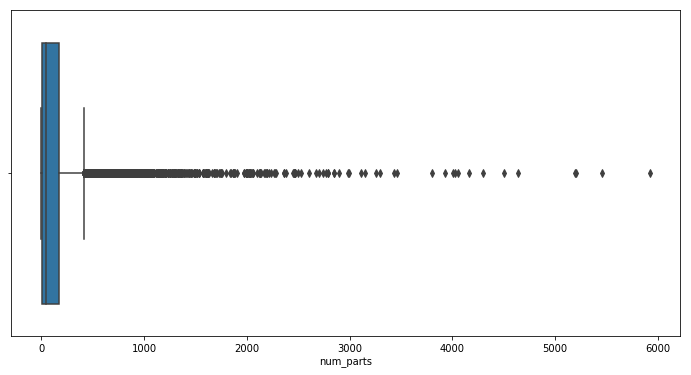

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(sets.num_parts) # There are sets with as many as 5000, 6000 Parts!!!

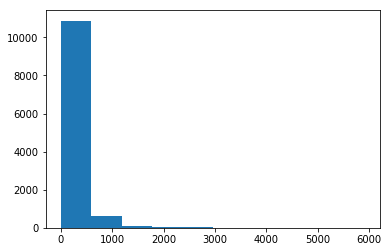

In [13]:
plt.hist(sets.num_parts);

In [14]:
sets.num_parts.sort_values(ascending=True) # Make a note of '-1' and most probably replace it with '0' later.

11645      -1
1683       -1
6545       -1
1837        0
11144       0
         ... 
8322     4640
161      5195
1337     5200
11614    5461
170      5922
Name: num_parts, Length: 11673, dtype: int64

![](http://)BIVARIATE **ANALYSIS

In [15]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


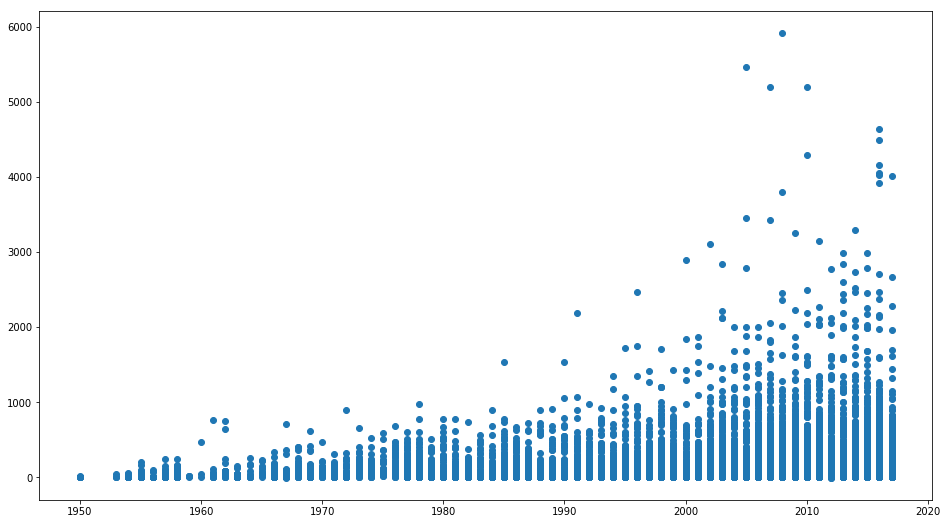

In [16]:
plt.figure(figsize=(16,9))
plt.scatter(sets['year'],sets['num_parts']);# We can see that there has been a steady increase in number of parts through the years. There are few outliers though !

In [17]:
sets.corr()['num_parts'].sort_values(ascending = False)

num_parts    1.000000
year         0.116722
theme_id    -0.133707
Name: num_parts, dtype: float64

In [18]:
sd = sets.groupby('year')['year'].count()

In [19]:
sd

year
1950      7
1953      4
1954     14
1955     28
1956     12
       ... 
2013    593
2014    713
2015    665
2016    596
2017    296
Name: year, Length: 66, dtype: int64

<Figure size 1152x648 with 0 Axes>

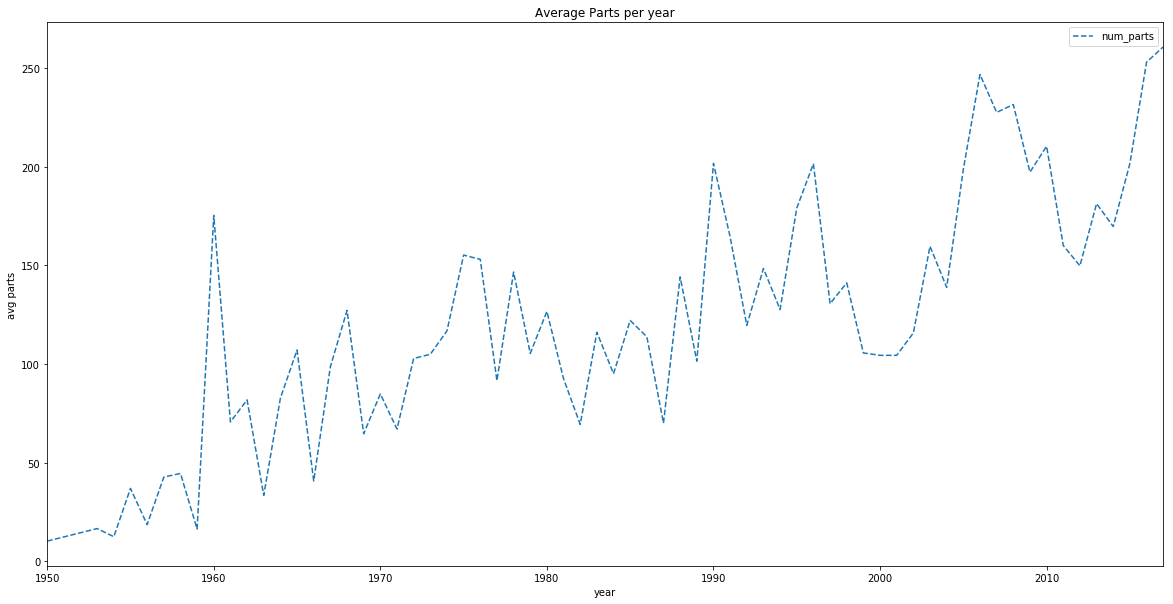

In [20]:
new_df = pd.DataFrame(sets.groupby('year')['num_parts'].mean())
plt.figure(figsize=(16,9));
new_df.plot(style='--');
plt.title('Average Parts per year')
plt.ylabel('avg parts')
plt.gcf().set_size_inches(20, 10)

In [21]:
sets.groupby('year')['theme_id'].count()
theme_df = pd.DataFrame(sets.groupby('year')['theme_id'].nunique())
theme_df

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3
...,...
2013,93
2014,92
2015,98


Each set has got certain parts which are used to assemble to get required figure or block. In the trend above , we can see the num of parts is gradually inceasing every year, but it not normal trend, in some years it goes down and raised again.



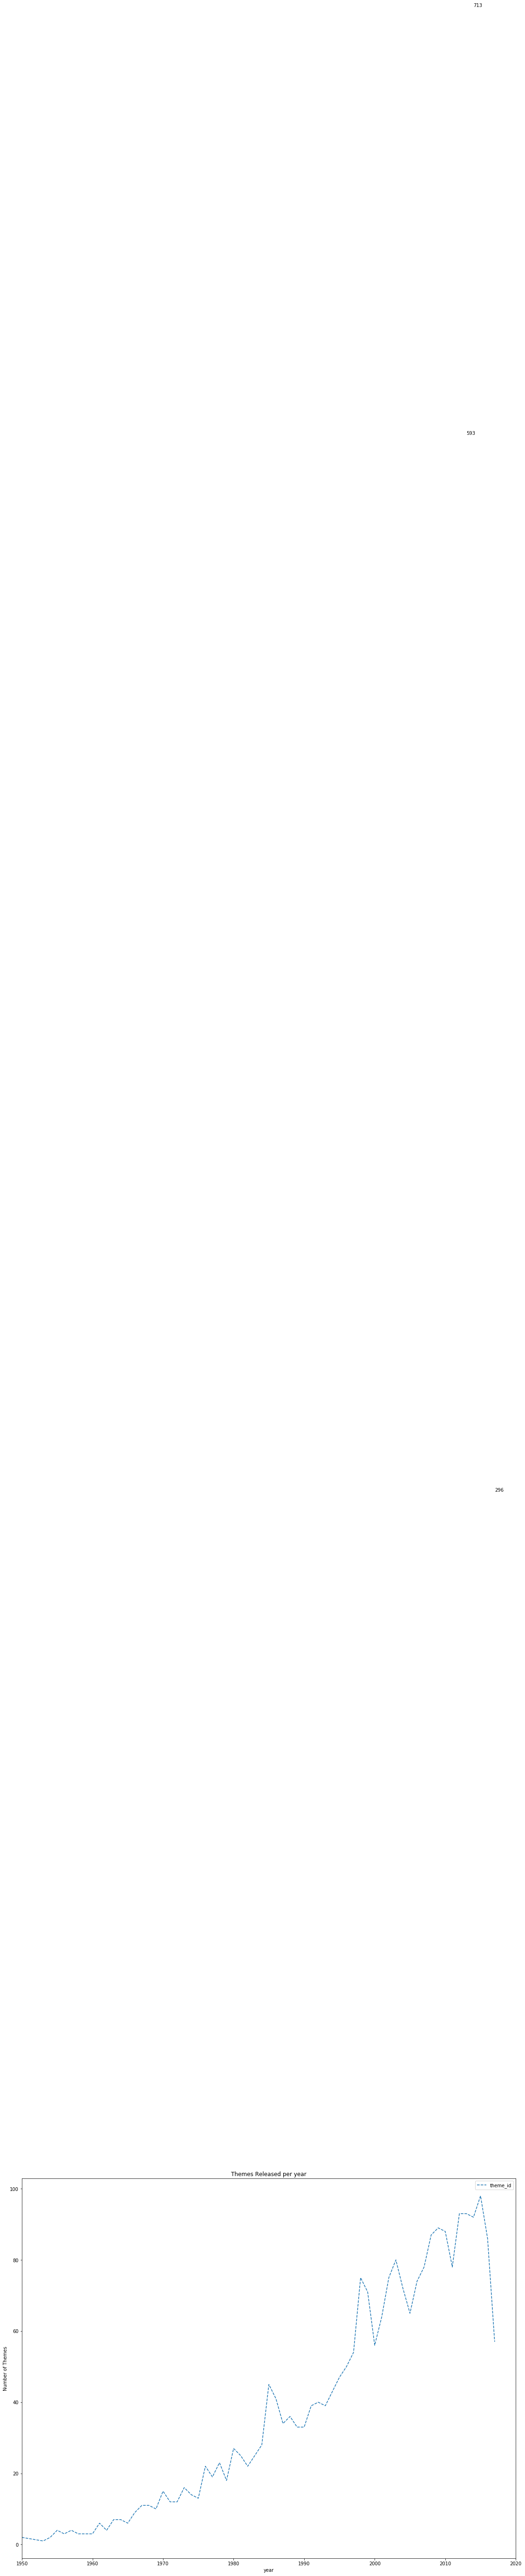

In [22]:
fig, ax = plt.subplots(figsize=(19,15))
#plt.figure(figsize=(12,16));
theme_df.plot(ax=ax,style='--');
#plt.title('Themes Released per year');
#plt.ylabel('Number of Themes');
plt.xlim(1950,2020);
#plt.gcf().set_size_inches(20, 10)
ax.set(title='Themes Released per year',ylabel='Number of Themes')
style = dict(size=10, color='black')
ax.text(2013, 593, '593',**style)
ax.text(2017, 296, '296',**style)
ax.text(2014, 713, '713',va='bottom',**style)
plt.show()

We can see that the Number of themes released per year was increasing steadily till around 2015, after which there has been a sudden drop!

**PARTS DATASET**

In [23]:
parts = pd.read_csv('/kaggle/input/lego-database/parts.csv')
parts_cat = pd.read_csv('/kaggle/input/lego-database/part_categories.csv')

In [24]:
parts.shape

(25993, 3)

In [25]:
parts.head()
parts.tail()

,part_num,name,part_cat_id
25988,zbb013,Znap Connector 3 x 3 - 4 way B (Beam),43
25989,zbb014,Znap Connector 1 x 3 - 2 way A,43
25990,zbb015,"Znap Beam 3, 1 Hole",43
25991,zbb018,Znap Connector 3 x 3 - 4 way C (Closed),43
25992,zbb022,Wheel 68mm Znap Propeller (9 x 2),29


In [26]:
parts_cat.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [27]:
parts_cat.shape, parts.shape

((57, 2), (25993, 3))

In [28]:
Merged_DF = pd.merge(parts,parts_cat,left_on="part_cat_id",right_on="id",suffixes=["_part","_category"]).drop('id',axis=1)

In [29]:
Merged_DF.head()
Merged_DF.query("name_category == 'Minifigs'")

,part_num,name_part,part_cat_id,name_category
2371,10048,Minifig Hair Tousled,13,Minifigs
2372,10057,Body / Head Gollum,13,Minifigs
2373,10057pr0001,Body / Head Gollum - Wide Eyes,13,Minifigs
2374,10057pr0002,Body / Head Gollum - Narrow Eyes,13,Minifigs
2375,10058,"Arm, Bent [Gollum]",13,Minifigs
...,...,...,...,...
10922,x581c08,Fabuland Figure Bulldog 8 2h,13,Minifigs
10923,x588c04,Fabuland Figure Elephant 4 with Black Eyes,13,Minifigs
10924,x592c04,Fabuland Figure Horse 4 6d,13,Minifigs
10925,x599c04,Fabuland Figure Pig 4 11d,13,Minifigs


In [30]:
NEW_DF = pd.DataFrame(Merged_DF['name_category'].value_counts())

In [31]:
#cat_count = pd.DataFrame(Merged_DF.groupby('name_category')['name_part'].count())
NEW_DF

,name_category
Minifigs,8556
Minifig Accessories,2071
Non-LEGO,1964
"Duplo, Quatro and Primo",1552
Tiles Printed,1191
Other,1125
"Bionicle, Hero Factory and Constraction",1116
Bricks Printed,744
Plants and Animals,742
"Power Functions, Mindstorms and Electric",462


[Text(0.5, 1.0, 'No. of Parts belonging to Category')]

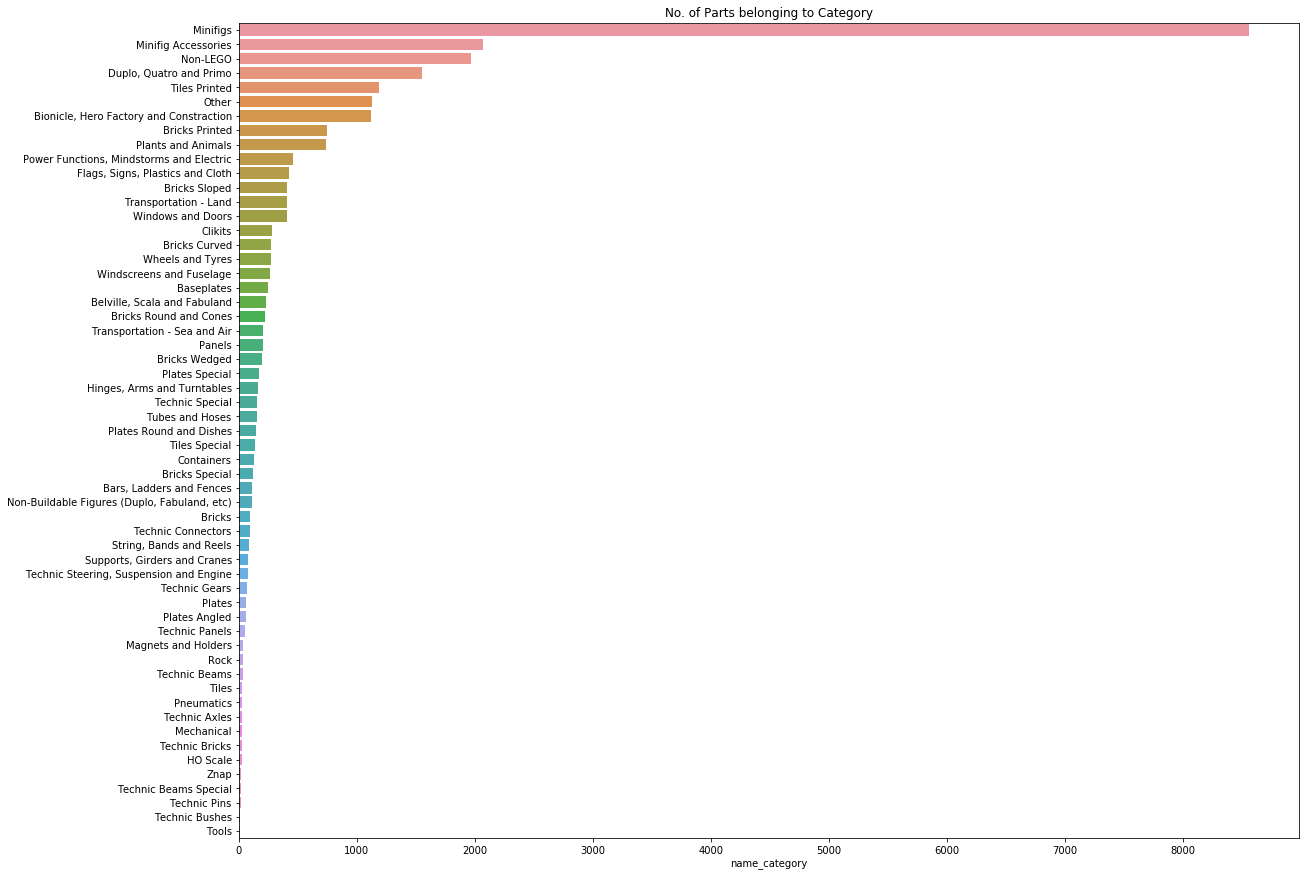

In [32]:
fig, ax = plt.subplots(figsize=(19,15))
sns.barplot(y=NEW_DF.index,x=NEW_DF['name_category'])
ax.set(title='No. of Parts belonging to Category') # Minifig category has got more parts

In [33]:
themes = pd.read_csv('/kaggle/input/lego-database/themes.csv')
#parts_cat = pd.read_csv('/kaggle/input/lego-database/part_categories.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [34]:
inv = pd.read_csv('/kaggle/input/lego-database/inventories.csv')
inv_sets = pd.read_csv('/kaggle/input/lego-database/inventory_sets.csv')
inv_parts = pd.read_csv('/kaggle/input/lego-database/inventory_parts.csv')
inv_sets.shape #  inventory_id,set_num , quantity (2846, 3)
#inv_parts.shape #  inventory_id,part_num , quantity,is_spare (580251, 5)
#inv.shape  # id, version,set_num (11681,3)

inv

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1
...,...,...,...
11676,18593,1,31066-1
11677,18645,1,71018-7
11678,18701,1,71018-17
11679,18704,1,60159-1


# SET , THEME , PARTS !!!

In [35]:
    sets.shape

(11673, 5)

In [36]:
inv.shape

(11681, 3)

In [37]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [38]:
inv.head()
merge_inv_set = pd.merge(inv,sets,on="set_num")
new_df = pd.DataFrame(merge_inv_set.groupby('set_num')['id'].count())
new_df.query('set_num == "4520-1"')
# No point in joining invntories and sets as one gives metadata for sets and other gives standalone inventory details

,id
set_num,
4520-1,1


[Text(0.5, 1.0, 'Quantity of Sets')]

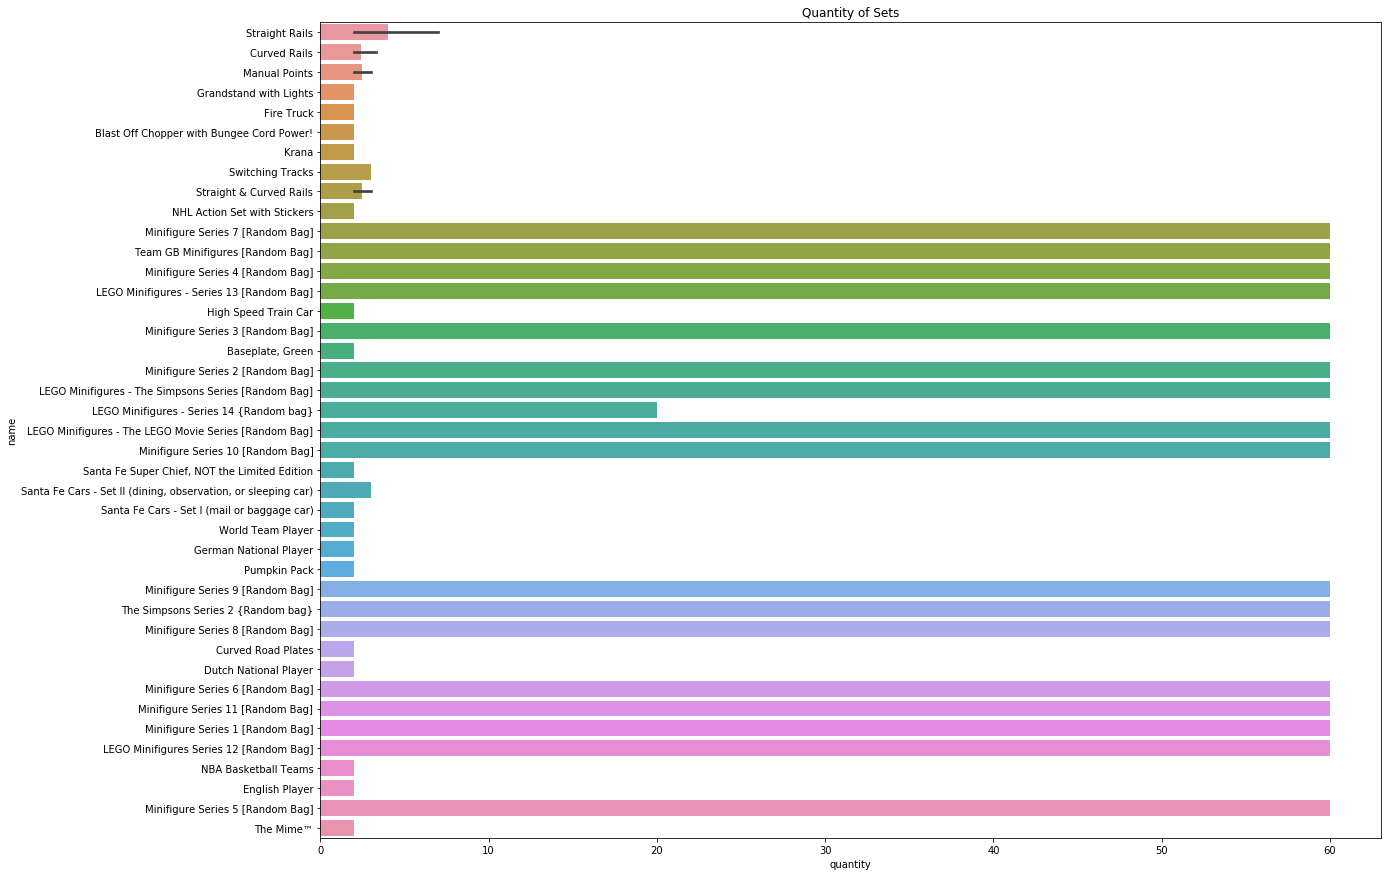

In [39]:
merge_inv_set = pd.merge(inv_sets,sets,on="set_num")
merge_inv_set = merge_inv_set[merge_inv_set.quantity>1]
# Lets see which SET's quantity is highest in Inventory?
fig, ax = plt.subplots(figsize=(19,15))
sns.barplot(x=merge_inv_set.quantity,y=merge_inv_set['name'])
ax.set(title='Quantity of Sets') # Many sets have stocks as high as 60!

# Inventory parts give us an idea of which color is used most . In other words, We can count number of parts per color.`

In [40]:
col = pd.read_csv('/kaggle/input/lego-database/colors.csv')
inv_parts.shape,parts.shape,col.shape

((580251, 5), (25993, 3), (135, 4))

In [41]:
temp_df1 = pd.merge(inv_parts,parts)
inv_parts.columns,parts.columns,col.columns

(Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare'], dtype='object'),
 Index(['part_num', 'name', 'part_cat_id'], dtype='object'),
 Index(['id', 'name', 'rgb', 'is_trans'], dtype='object'))

In [42]:
temp_df1
temp_df2 = pd.merge(temp_df1,col,left_on="color_id",right_on="id",suffixes=["_part","_color"]).drop("id",axis=1)
part_color_df = temp_df2.groupby('name_color')['name_part'].nunique()
part_color_df = part_color_df.sort_values(ascending=False)

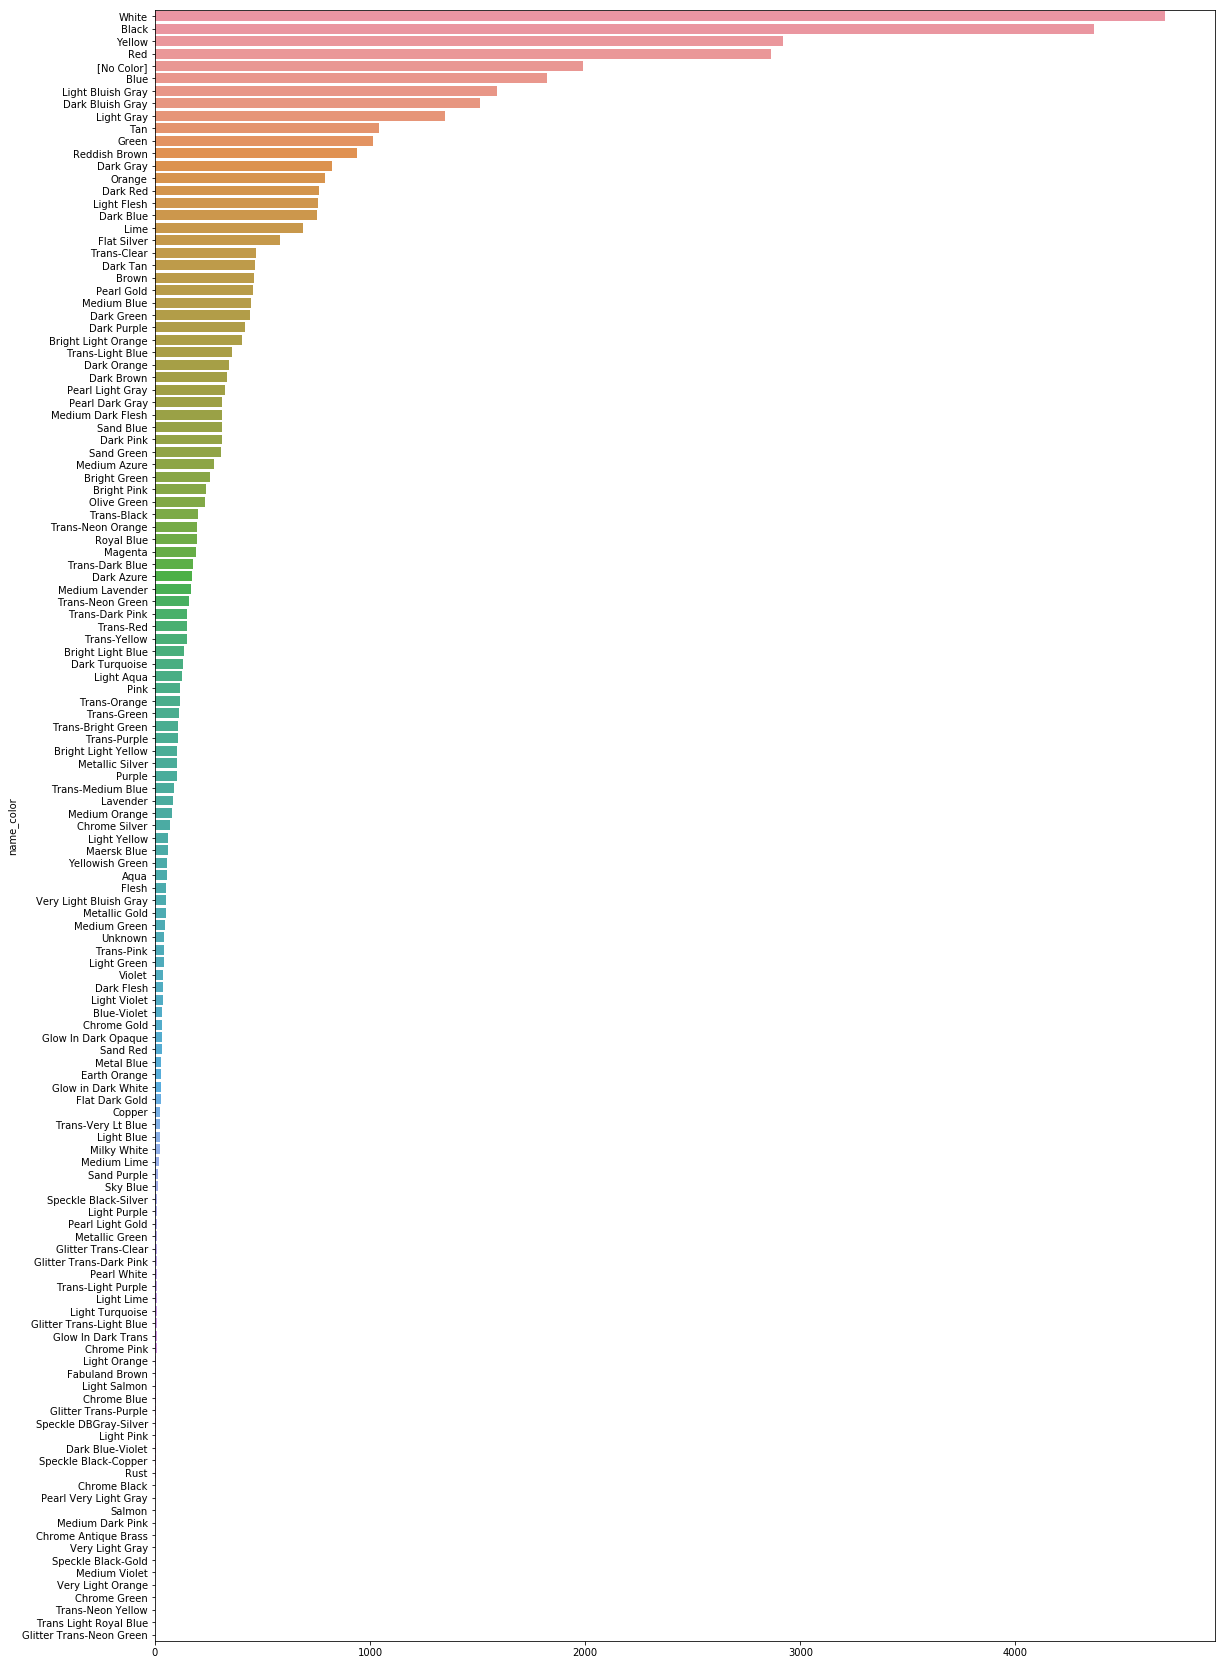

In [43]:
fig, ax = plt.subplots(figsize=(19,30))
sns.barplot(y=part_color_df.index,x=part_color_df.values)